<a href="https://colab.research.google.com/github/AbhinavKumar0000/Machine_learning_practice/blob/main/My_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_f = pd.read_csv("insurance_data.csv")
data_f.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
data_f.shape

(28, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_f[['age','affordibility']],data_f.bought_insurance,test_size = 0.2,random_state=25)

In [ ]:
len(X_test)

6

In [ ]:
len(X_train)

22

In [ ]:
X_trained_scaled = X_train.copy()
X_trained_scaled['age'] = X_trained_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

X_trained_scaled

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1
19,0.18,1
25,0.54,1
16,0.25,0
20,0.21,1
3,0.52,0


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape =(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)

model.fit(X_trained_scaled,y_train,epochs =5000)

Epoch 1/5000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7273 - loss: 0.5321
Epoch 2502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7273 - loss: 0.5321
Epoch 2503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7273 - loss: 0.5321
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7273 - loss: 0.5320
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7273 - loss: 0.5320
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7273 - loss: 0.5320
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7273 - loss: 0.5319
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7273 - loss: 0.5319
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7273 - loss: 0.5318
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7273 - loss: 0.5318
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 1.0000 - loss: 0.3550


[0.3549776077270508, 1.0]

In [ ]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.7260696 ],
       [0.8294983 ]], dtype=float32)

In [ ]:
y_test

,bought_insurance
2,1
10,0
21,0
11,0
14,1
9,1


In [ ]:
coef,intercept = model.get_weights()
coef,intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

In [ ]:
def sigmoid(x):
  import math
  return 1/(1 + math.exp(-x))

In [ ]:
def predicition_function(age, affordibility):
  weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
  return sigmoid(weighted_sum)

we will use binary loss/ log loss here, and as we know log(0) is undefined and log(1) is zero so we will comvert 0 and 1 into 0.000001 and 0.9999999999 by replacig 0 with epsilon 1e^-15 and with 1 - epsilon for 1

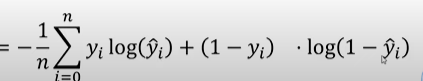

In [ ]:
def log_loss(y_true, y_predicted):
  epsilon = 1e-15
  y_predicted_new = [max(i,epsilon) for i in y_predicted]
  y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)

  loss = -np.mean(y_true * np.log(y_predicted_new) + (1-y_true) * np.log(1- y_predicted_new))
  return loss

In [ ]:
def sigmoid_numpy(x):
  return 1/(1+np.exp(-x))


In [ ]:
def gradient_descent(age, affordability, y_true, epochs):
  w1 = w2 = 1
  bias = 0
  rate = 0.5
  n = len(age)

  for i in range(epochs):
    weighted_sum = w1 * age + w2 * affordability + bias
    y_predicted = sigmoid_numpy(weighted_sum)


    loss = log_loss(y_true,y_predicted)

    w1d = (1/n)*np.dot(np.transpose(age),(y_predicted - y_true))
    w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted - y_true))

    bias_d = np.mean(y_predicted - y_true)

    w1 = w1 - rate * w1d
    w2 = w2 - rate * w2d
    bias = bias - rate *bias_d

    print(f"epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}")

  return w1, w2, bias


In [ ]:
gradient_descent(X_trained_scaled['age'],X_trained_scaled['affordibility'],y_train, 1000)

epoch:0, w1:0.9498152669403539, w2:0.8966962507890579, bias:-0.22683735472737165, loss:0.7113403233723417
epoch:1, w1:0.9237463742947992, w2:0.8320196659575342, bias:-0.3932380739944269, loss:0.6559178222899531
epoch:2, w1:0.9164541950355887, w2:0.7981834270508857, bias:-0.5129025502074944, loss:0.6284293616546218
epoch:3, w1:0.9222829818067645, w2:0.7859556216917515, bias:-0.5999326956704547, loss:0.6152627286779657
epoch:4, w1:0.9367158050102926, w2:0.7876595490115597, bias:-0.6654442999616322, loss:0.6084987301979781
epoch:5, w1:0.9566045099919053, w2:0.7978555623689202, bias:-0.7171325862284252, loss:0.6044015716234304
epoch:6, w1:0.9798965300792565, w2:0.8129788647781893, bias:-0.7599977784529061, loss:0.6013994498706056
epoch:7, w1:1.0052966350274757, w2:0.8307858000703334, bias:-0.797191169382852, loss:0.5988675580849978
epoch:8, w1:1.0320002703955709, w2:0.8498966685566112, bias:-0.8306709894047359, loss:0.5965628889281314
epoch:9, w1:1.0595110723564933, w2:0.8694768031691089, 

(np.float64(10.030354791161182),
 np.float64(1.7886827764248825),
 np.float64(-5.281816992983206))

In [ ]:
def prediction_function(age, affordibility, w1, w2, bias):
    weighted_sum = w1*age + w2*affordibility + bias
    return sigmoid(weighted_sum)

predicition_function(.47,1)

/tmp/ipython-input-16-1434727866.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1 + math.exp(-x))


0.705484819775958

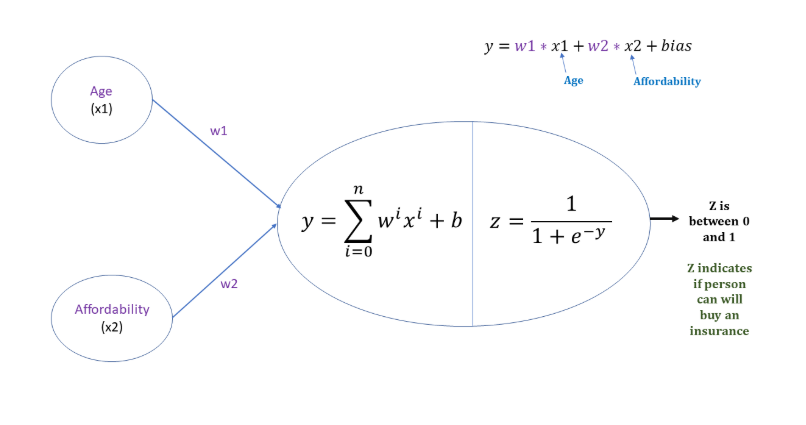

In [ ]:
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)

            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d

            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [ ]:
customModel = myNN()
customModel.fit(X_trained_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572745, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917
Final weights and bias: w1: 5.051047623653049, w2: 